In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
import seaborn as sns

Using TensorFlow backend.


In [14]:
df = pd.read_csv("measurements2.csv")

In [15]:
df.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [16]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [17]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [18]:
df.mean()

distance         19.652835
consume           4.912371
speed            41.927835
temp_inside      21.929521
temp_outside     11.358247
AC                0.077320
rain              0.123711
sun               0.082474
refill liters    37.115385
dtype: float64

In [19]:
df.median()

distance         14.6
consume           4.7
speed            40.5
temp_inside      22.0
temp_outside     10.0
AC                0.0
rain              0.0
sun               0.0
refill liters    38.0
dtype: float64

In [20]:
df.fillna(df.median(),inplace=True)

In [21]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters      0
refill gas       375
dtype: int64

In [23]:
df.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.074734,0.088175,-0.025738,-0.019791,0.081120,0.031682
consume,-0.128967,1.000000,-0.227866,-0.161470,-0.320811,0.096591,0.248118,-0.170667,0.019709
speed,0.562299,-0.227866,1.000000,0.059139,0.015411,-0.035408,0.009489,0.081618,0.009457
temp_inside,0.074734,-0.161470,0.059139,1.000000,0.359649,0.296719,-0.037204,0.242237,0.006602
temp_outside,0.088175,-0.320811,0.015411,0.359649,1.000000,0.167562,-0.186315,0.346903,-0.005999
AC,-0.025738,0.096591,-0.035408,0.296719,0.167562,1.000000,0.242915,0.088598,0.005650
rain,-0.019791,0.248118,0.009489,-0.037204,-0.186315,0.242915,1.000000,-0.112650,-0.121536
sun,0.081120,-0.170667,0.081618,0.242237,0.346903,0.088598,-0.112650,1.000000,0.005852
refill liters,0.031682,0.019709,0.009457,0.006602,-0.005999,0.005650,-0.121536,0.005852,1.000000


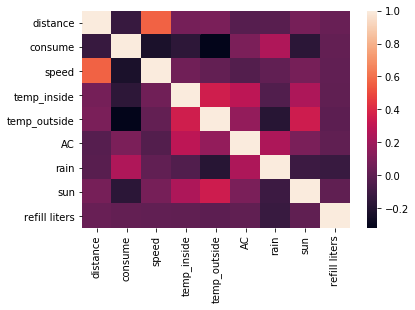

In [28]:
sns.heatmap(df.corr())

In [25]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474,37.970361
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441,1.520514
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,38.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,38.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [26]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,38.0,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,38.0,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,38.0,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,38.0,NaN


In [35]:
x = df.iloc[:,[0,2,3,4,7,8,9]]
y = df.iloc[:,1].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
def model():
    ai = Sequential()
    
    ai.add(Dense(128,kernel_initializer="uniform",activation='relu',input_dim=7))
    ai.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    ai.add(Dense(32,kernel_initializer="uniform",activation="relu"))
    ai.add(Dense(1,activation='linear'))
    
    ai.compile(optimizer="Adam",loss='mse',metrics=['mse','mae'])
    return ai    

In [61]:
from keras.wrappers.scikit_learn import KerasRegressor

In [62]:
ai = KerasRegressor(build_fn = model,batch_size=3,epochs=300)

In [64]:
history = ai.fit(x_train,y_train)

Epoch 1/300
310/310 [==============================] - 0s 569us/step - loss: 4.8764 - mse: 4.8764 - mae: 1.6443
Epoch 2/300
310/310 [==============================] - 0s 283us/step - loss: 1.2213 - mse: 1.2213 - mae: 0.7638
Epoch 3/300
310/310 [==============================] - 0s 264us/step - loss: 0.9423 - mse: 0.9423 - mae: 0.6834
Epoch 4/300
310/310 [==============================] - 0s 257us/step - loss: 0.8224 - mse: 0.8224 - mae: 0.6450
Epoch 5/300
310/310 [==============================] - 0s 254us/step - loss: 0.7504 - mse: 0.7504 - mae: 0.6066
Epoch 6/300
310/310 [==============================] - 0s 254us/step - loss: 0.7961 - mse: 0.7961 - mae: 0.6449
Epoch 7/300
310/310 [==============================] - 0s 254us/step - loss: 0.7236 - mse: 0.7236 - mae: 0.6354
Epoch 8/300
310/310 [==============================] - 0s 254us/step - loss: 0.6666 - mse: 0.6666 - mae: 0.6101
Epoch 9/300
310/310 [==============================] - 0s 251us/step - loss: 0.6723 - mse: 0.6723 - mae:

310/310 [==============================] - 0s 267us/step - loss: 0.4386 - mse: 0.4386 - mae: 0.4879
Epoch 74/300
310/310 [==============================] - 0s 257us/step - loss: 0.4228 - mse: 0.4228 - mae: 0.4770
Epoch 75/300
310/310 [==============================] - 0s 251us/step - loss: 0.3930 - mse: 0.3930 - mae: 0.4698
Epoch 76/300
310/310 [==============================] - 0s 248us/step - loss: 0.4176 - mse: 0.4176 - mae: 0.4826
Epoch 77/300
310/310 [==============================] - 0s 248us/step - loss: 0.4105 - mse: 0.4105 - mae: 0.4710
Epoch 78/300
310/310 [==============================] - 0s 248us/step - loss: 0.3905 - mse: 0.3905 - mae: 0.4770
Epoch 79/300
310/310 [==============================] - 0s 245us/step - loss: 0.4094 - mse: 0.4094 - mae: 0.4749
Epoch 80/300
310/310 [==============================] - 0s 241us/step - loss: 0.3976 - mse: 0.3976 - mae: 0.4589
Epoch 81/300
310/310 [==============================] - 0s 248us/step - loss: 0.4287 - mse: 0.4287 - mae: 0.4

310/310 [==============================] - 0s 251us/step - loss: 0.3199 - mse: 0.3199 - mae: 0.4193
Epoch 146/300
310/310 [==============================] - 0s 241us/step - loss: 0.3123 - mse: 0.3123 - mae: 0.4074
Epoch 147/300
310/310 [==============================] - 0s 248us/step - loss: 0.3429 - mse: 0.3429 - mae: 0.4362
Epoch 148/300
310/310 [==============================] - 0s 248us/step - loss: 0.3386 - mse: 0.3386 - mae: 0.4314
Epoch 149/300
310/310 [==============================] - 0s 241us/step - loss: 0.3232 - mse: 0.3232 - mae: 0.4294
Epoch 150/300
310/310 [==============================] - 0s 245us/step - loss: 0.4107 - mse: 0.4107 - mae: 0.4557
Epoch 151/300
310/310 [==============================] - 0s 241us/step - loss: 0.3162 - mse: 0.3162 - mae: 0.4151
Epoch 152/300
310/310 [==============================] - 0s 241us/step - loss: 0.3529 - mse: 0.3529 - mae: 0.4511
Epoch 153/300
310/310 [==============================] - 0s 251us/step - loss: 0.3006 - mse: 0.3006 - 

Epoch 217/300
310/310 [==============================] - 0s 251us/step - loss: 0.3493 - mse: 0.3493 - mae: 0.4311
Epoch 218/300
310/310 [==============================] - 0s 248us/step - loss: 0.2891 - mse: 0.2891 - mae: 0.3938
Epoch 219/300
310/310 [==============================] - 0s 245us/step - loss: 0.3014 - mse: 0.3014 - mae: 0.4017
Epoch 220/300
310/310 [==============================] - 0s 244us/step - loss: 0.2916 - mse: 0.2916 - mae: 0.3998
Epoch 221/300
310/310 [==============================] - 0s 309us/step - loss: 0.2934 - mse: 0.2934 - mae: 0.3925
Epoch 222/300
310/310 [==============================] - 0s 264us/step - loss: 0.3028 - mse: 0.3028 - mae: 0.3965
Epoch 223/300
310/310 [==============================] - 0s 254us/step - loss: 0.2872 - mse: 0.2872 - mae: 0.3933
Epoch 224/300
310/310 [==============================] - 0s 251us/step - loss: 0.3112 - mse: 0.3112 - mae: 0.4018
Epoch 225/300
310/310 [==============================] - 0s 251us/step - loss: 0.3407 - 

310/310 [==============================] - 0s 245us/step - loss: 0.2509 - mse: 0.2509 - mae: 0.3819
Epoch 289/300
310/310 [==============================] - 0s 241us/step - loss: 0.2679 - mse: 0.2679 - mae: 0.3870
Epoch 290/300
310/310 [==============================] - 0s 245us/step - loss: 0.2512 - mse: 0.2512 - mae: 0.3843
Epoch 291/300
310/310 [==============================] - 0s 248us/step - loss: 0.2772 - mse: 0.2772 - mae: 0.3840
Epoch 292/300
310/310 [==============================] - 0s 245us/step - loss: 0.2746 - mse: 0.2746 - mae: 0.3911
Epoch 293/300
310/310 [==============================] - 0s 241us/step - loss: 0.2549 - mse: 0.2549 - mae: 0.3758
Epoch 294/300
310/310 [==============================] - 0s 248us/step - loss: 0.2600 - mse: 0.2600 - mae: 0.3858
Epoch 295/300
310/310 [==============================] - 0s 245us/step - loss: 0.2704 - mse: 0.2704 - mae: 0.3797
Epoch 296/300
310/310 [==============================] - 0s 251us/step - loss: 0.2787 - mse: 0.2787 - 

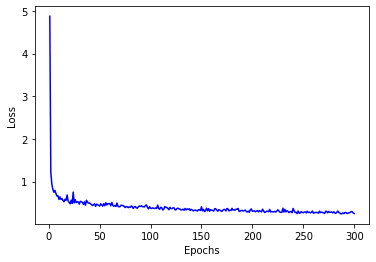

In [66]:
epoch_count = range(1,len(history.history["loss"])+1)

plt.plot(epoch_count,history.history["loss"],'b-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Here We Will Make Predictions Via User Input:-

In [69]:
distance = input("Enter the distance to be travelled(in Kms)")
speed = input("Enter the avg speed of the car(in miles/hr)")
temp_inside = input("Enter the temperature inside the car(in Celcius)")
temp_outside = input("Enter the temperature outside the car(in Celcius)")
AC = input("Is the AC on?(1 for Yes,0 For NO)")
rain = input("Is it raining outside?(1 for Yes,0 For NO)")
sun = input("Is the sun out?(1 for Yes,0 For NO)")

Enter the distance to be travelled(in Kms)56
Enter the avg speed of the car(in miles/hr)30
Enter the temperature inside the car(in Celcius)22
Enter the temperature outside the car(in Celcius)15
Is the AC on?(1 for Yes,0 For NO)1
Is it raining outside?(1 for Yes,0 For NO)0
Is the sun out?(1 for Yes,0 For NO)1


In [75]:
x_pred = np.array([distance,speed,temp_inside,temp_outside,AC,rain,sun]).reshape(1,-1)
y_pred = ai.predict(x_pred)
print("The car is expected to drive for",end=" ")
print(*y_pred,end=" ")
print("Kms")

The car is expected to drive for 4.4272165 Kms
